# Loading and Verification

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np
df = pd.read_csv('sales_data.csv')

In [6]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16393 entries, 0 to 16392
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     16393 non-null  object
 1   rating                    16334 non-null  object
 2   number_of_reviews         16334 non-null  object
 3   bought_in_last_month      14963 non-null  object
 4   current/discounted_price  11895 non-null  object
 5   price_on_variant          16393 non-null  object
 6   listed_price              16393 non-null  object
 7   is_best_seller            16393 non-null  object
 8   is_sponsored              16393 non-null  object
 9   is_couponed               16393 non-null  object
 10  buy_box_availability      10894 non-null  object
 11  delivery_details          11968 non-null  object
 12  sustainability_badges     1256 non-null   object
 13  image_url                 16393 non-null  object
 14  product_url           

,title,rating,number_of_reviews,bought_in_last_month,current/discounted_price,price_on_variant,listed_price,is_best_seller,is_sponsored,is_couponed,buy_box_availability,delivery_details,sustainability_badges,image_url,product_url,collected_at
count,16393,16334,16334,14963,11895,16393,16393,16393,16393,16393,10894,11968,1256,16393,15496,16392
unique,8561,31,4313,52,2499,3391,885,4,2,34,1,206,16,7818,15496,590
top,"Duracell Coppertop 9V Battery, 6 Count (Pack o...",4.4 out of 5 stars,8,100+ bought in past month,29.99,basic variant price: nan,No Discount,No Badge,Organic,No Coupon,Add to cart,"Delivery Mon, Sep 1",Small Business,https://m.media-amazon.com/images/I/51Xr76m2WL...,/Dell-Inspiron-3511-Non-Touch-Laptop/dp/B09GYN...,2025-08-25 10:47:14
freq,301,2744,251,2558,370,7795,11881,15917,13594,15678,10894,5947,490,487,1,33


In [47]:
df.isnull().sum()

,0
title,0
number_of_reviews,7150
current/discounted_price,4760
is_best_seller,0
is_sponsored,0
is_couponed,0
buy_box_availability,0
delivery_details,0
sustainability_badges,0
image_url,0


# Cleaning

In [8]:
df[['number_of_reviews', 'bought_in_last_month', ]] = df[['number_of_reviews', 'bought_in_last_month', ]].fillna(0)
# cleaned with 0's because the values in place could easily be satisfied with 0

In [9]:
df[['product_url', 'delivery_details', 'buy_box_availability']] = df[['product_url', 'delivery_details', 'buy_box_availability']].fillna('')
df['sustainability_badges'] = df['sustainability_badges'].fillna('Unknown')
#Unknown was used because these categories had easy interpretation of what should be unknown

In [10]:
df['rating_numeric'] = df['rating'].str.extract(r'(\d+\.\d+)').astype(float)
df['rating_numeric'] = pd.to_numeric(df['rating_numeric'])
#rating needed to be converted to numeric to make graphing easier in the future.

In [11]:
df['bought_in_last_month_clean'] = df['bought_in_last_month'].str.replace('+', '', regex=False)
def convert_to_number(x):
    if isinstance(x, str):
        x = x.lower().replace('k', '000')
        match = re.search(r'(\d+\.?\d*)', x)
        if match:
            return float(match.group())
    return x

df['bought_in_last_month_clean'] = df['bought_in_last_month'].apply(convert_to_number)
#made the string into numeric values, easier to read and compute

In [12]:
def extract_price_variant(x):
  if isinstance(x, str):
    match = re.search(r'\$?(\d+\.?\d*)', x)
    if match:
      return float(match.group(1))
  return np.nan
df['price_on_variant_clean'] = df['price_on_variant'].apply(extract_price_variant)
#converts all of my non numeric values into numeric values that can be used

In [13]:
def clean_listed_price(x):
  if isinstance(x, str):
    if 'no discount' in x.lower():
      return np.nan
    match = re.search(r'\$?(\d+\.?\d*)', x)
    if match:
      return float(match.group(1))
  elif isinstance(x, (int, float)):
    return x
  return np.nan
df['listed_price_clean'] = df['listed_price'].apply(clean_listed_price)
#Listed price needed to be changed to numeric blank values because No Discount is confusing

In [14]:
df.drop(columns=[
    'bought_in_last_month',
    'price_on_variant',
    'listed_price',
    'rating'
], inplace=True)
#dropped irrelavant columns

In [15]:
string_cols = ['buy_box_availability', 'delivery_details', 'sustainability_badges', 'product_url']
for col in string_cols:
    df[col] = df[col].fillna('').astype(str)
#making it easier to group these columns if they are strings

In [16]:
for col in ['number_of_reviews', 'bought_in_last_month_clean',
            'listed_price_clean', 'price_on_variant_clean', 'current/discounted_price']:
    print(col, df[col].apply(type).value_counts())
#verifying values

number_of_reviews number_of_reviews
<class 'str'>    16334
<class 'int'>       59
Name: count, dtype: int64
bought_in_last_month_clean bought_in_last_month_clean
<class 'float'>    12900
<class 'str'>       2063
<class 'int'>       1430
Name: count, dtype: int64
listed_price_clean listed_price_clean
<class 'float'>    16393
Name: count, dtype: int64
price_on_variant_clean price_on_variant_clean
<class 'float'>    16393
Name: count, dtype: int64
current/discounted_price current/discounted_price
<class 'str'>      11895
<class 'float'>     4498
Name: count, dtype: int64


In [17]:
numeric_cols = ['number_of_reviews', 'bought_in_last_month_clean',
            'listed_price_clean', 'price_on_variant_clean', 'current/discounted_price']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Grouping/Aggregation

In [18]:
grouped_df = df.groupby('title').agg({
    'rating_numeric': 'mean',
    'number_of_reviews': 'sum',
    'bought_in_last_month_clean': 'sum',
    'listed_price_clean': 'mean',
    'price_on_variant_clean': 'mean',
    'current/discounted_price': 'mean',
    'buy_box_availability': 'first',
    'delivery_details': 'first',
    'sustainability_badges': 'first'
}).reset_index()

#Derived Metrics

In [19]:
# discount metrics
df['discount_amount'] = df['listed_price_clean'] - df['price_on_variant_clean']
df['discount_percentage'] = (df['discount_amount'] / df['listed_price_clean']) * 100

In [20]:
# Purchase Efficiency
df['purchase_efficiency'] = df['bought_in_last_month_clean'] / df['number_of_reviews']


In [21]:
#Price Category
median_price = df['listed_price_clean'].median()
df['is_high_value_product'] = df['listed_price_clean'] > median_price
df['price_bracket'] = pd.cut(df['listed_price_clean'], bins=[0, 50, 150, 500, 1000], labels=["Low", "Medium", "High", "Very High"])

In [22]:
#popularity metrics
median_purchases = df['bought_in_last_month_clean'].median()
df['is_popular'] = df['bought_in_last_month_clean'] > median_purchases

In [23]:
#discount effectiveness
df['discount_effectiveness'] = df['discount_amount'] / df['listed_price_clean']

# EDA / Trend Analysis

## Verification of Grouped Aggregation

In [24]:
grouped_df.describe()

,rating_numeric,number_of_reviews,bought_in_last_month_clean,listed_price_clean,price_on_variant_clean,current/discounted_price
count,8515.000000,8561.000000,8.561000e+03,2687.000000,5246.000000,5627.000000
mean,4.441468,265.966826,2.216805e+03,130.361840,122.030823,132.114363
std,0.297502,1927.674044,6.570573e+04,161.496427,164.180860,168.769653
min,1.000000,0.000000,0.000000e+00,1.000000,1.000000,2.490000
25%,4.300000,0.000000,1.000000e+02,25.990000,21.798750,24.990000
50%,4.500000,5.000000,3.000000e+02,66.000000,59.785000,68.000000
75%,4.600000,253.000000,1.000000e+03,169.990000,148.000000,169.000000
max,5.000000,80704.000000,6.020000e+06,999.990000,999.000000,999.990000


In [25]:
grouped_df.sort_values('rating_numeric', ascending=False).head(10)

# Products with most reviews
grouped_df.sort_values('number_of_reviews', ascending=False).head(10)

# Products with most bought in last month
grouped_df.sort_values('bought_in_last_month_clean', ascending=False).head(10)

,title,rating_numeric,number_of_reviews,bought_in_last_month_clean,listed_price_clean,price_on_variant_clean,current/discounted_price,buy_box_availability,delivery_details,sustainability_badges
2969,"Duracell Coppertop 9V Battery, 6 Count (Pack o...",4.8,0.0,6020000.0,NaN,NaN,25.470000,Add to cart,"Delivery Mon, Sep 1",Unknown
3284,"Energizer AA Batteries Alkaline Power, 32 Coun...",4.8,0.0,600000.0,19.98,16.78,16.950000,Add to cart,"Delivery Fri, Aug 29",Unknown
3290,"Energizer AA and AAA Batteries, 48 Count, Comb...",4.8,0.0,240000.0,38.98,24.00,23.100000,Add to cart,"Delivery Fri, Aug 29",Unknown
3326,"Energizer MAX AA Batteries (16 Pack), Double A...",4.8,36832.0,214000.0,16.61,16.00,16.107757,Add to cart,"Delivery Mon, Sep 1",Unknown
1864,"Belkin MagSafe-Compatible Charger, 3-in-1 Wire...",4.4,0.0,181000.0,NaN,34.05,119.990000,Add to cart,"Delivery Mon, Sep 1",Unknown
8535,iOttie Easy One Touch Advanced Universal Car M...,4.4,0.0,145000.0,26.95,NaN,18.840000,Add to cart,"Delivery Tue, Sep 2",Small Business
6277,"Peak Design Slide Lite Camera Strap, Black, Co...",4.7,0.0,103500.0,NaN,NaN,69.950000,Add to cart,"Delivery Fri, Aug 29",Small Business
1299,"Amazon Basics Wood-Cased #2 Pencils, Pre-sharp...",4.8,0.0,100000.0,14.33,8.87,9.890000,Add to cart,"Delivery Fri, Aug 29",Unknown
7803,Texas Instruments TI-84 Plus CE Color Graphing...,4.6,0.0,100000.0,NaN,99.95,NaN,,,Unknown
2949,Duracell 2032 Lithium Battery. 4 Count Pack. C...,4.7,0.0,100000.0,NaN,4.00,NaN,,,Unknown


## General EDA Based on Original Columns

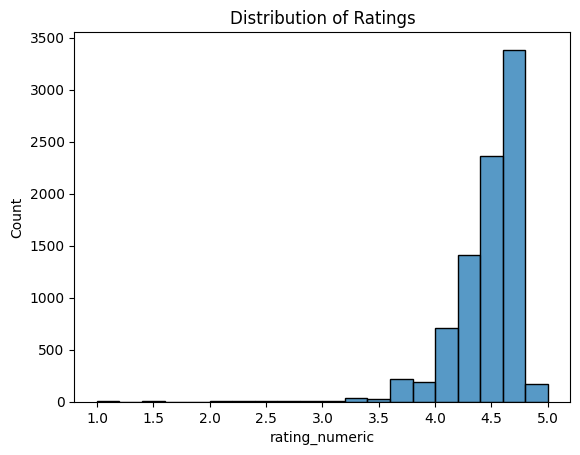

In [26]:
sns.histplot(grouped_df['rating_numeric'].dropna(), bins=20)
plt.title('Distribution of Ratings')
plt.show()

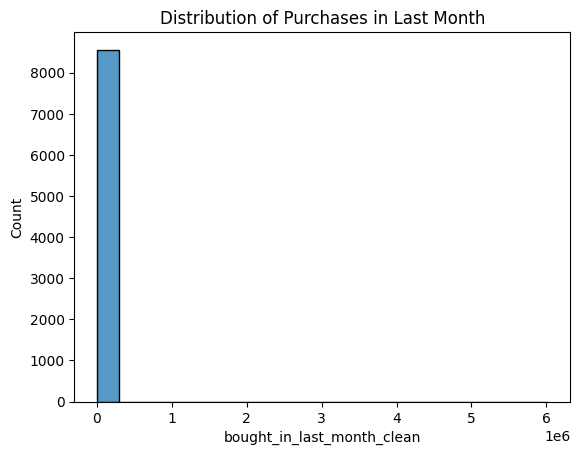

In [27]:
sns.histplot(grouped_df['bought_in_last_month_clean'].dropna(), bins=20)
plt.title('Distribution of Purchases in Last Month')
plt.show()

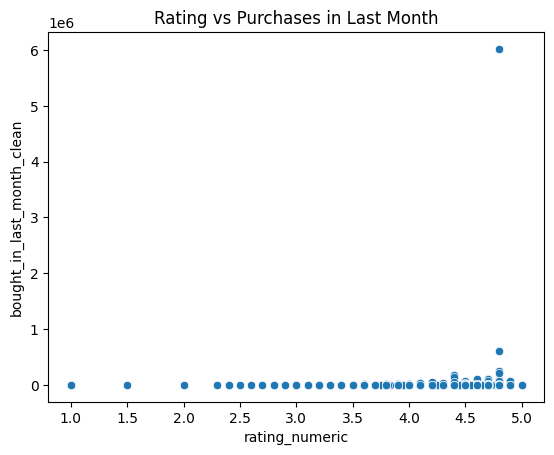

In [28]:
sns.scatterplot(
    data=grouped_df,
    x='rating_numeric',
    y='bought_in_last_month_clean'
)
plt.title('Rating vs Purchases in Last Month')
plt.show()


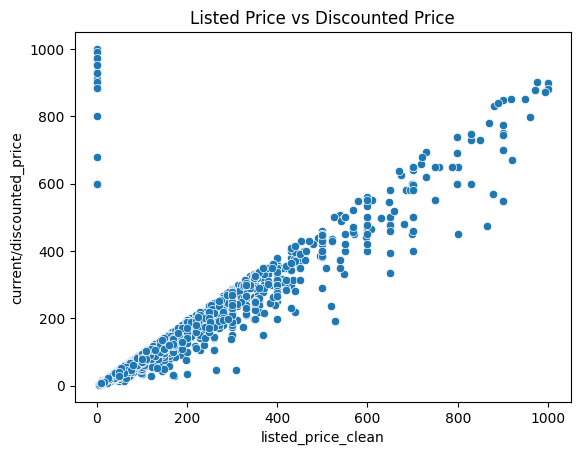

In [29]:
# Scatter plot: listed price vs discounted price
sns.scatterplot(
    data=grouped_df,
    x='listed_price_clean',
    y='current/discounted_price'
)
plt.title('Listed Price vs Discounted Price')
plt.show()

In [30]:
grouped_df.groupby('sustainability_badges')['bought_in_last_month_clean'].mean().sort_values(ascending=False)

,bought_in_last_month_clean
sustainability_badges,
1 sustainability certification,80000.000000
Safer chemicals +1 more,44950.000000
Forestry practices,5544.444444
Manufacturing practices,5141.538462
Small Business,3930.916031
Carbon impact,2585.057471
Recycled materials,2257.142857
Unknown,2144.346864
Works with Alexa,1646.134021


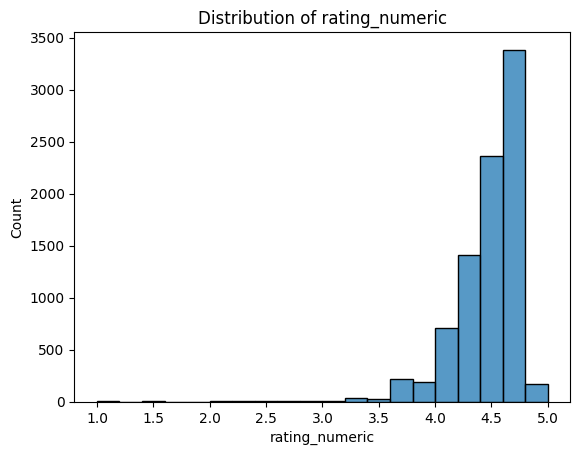

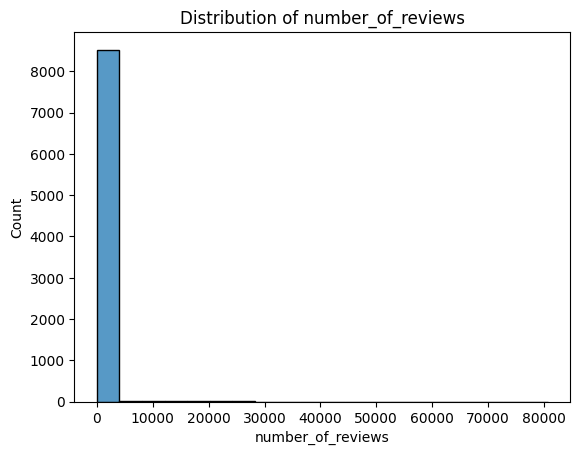

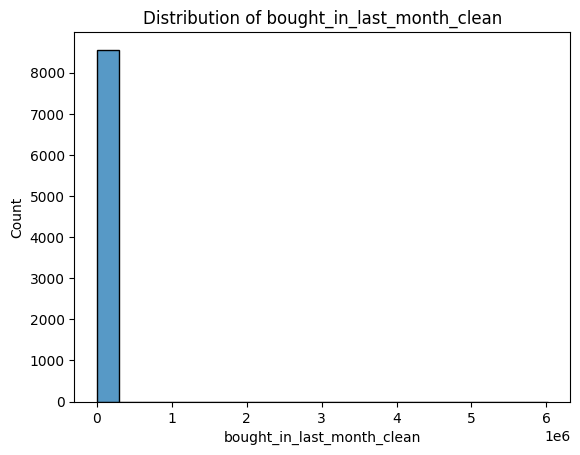

In [31]:
for col in ['rating_numeric', 'number_of_reviews', 'bought_in_last_month_clean']:
    sns.histplot(grouped_df[col].dropna(), bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()

## EDA on Derivied Metrics

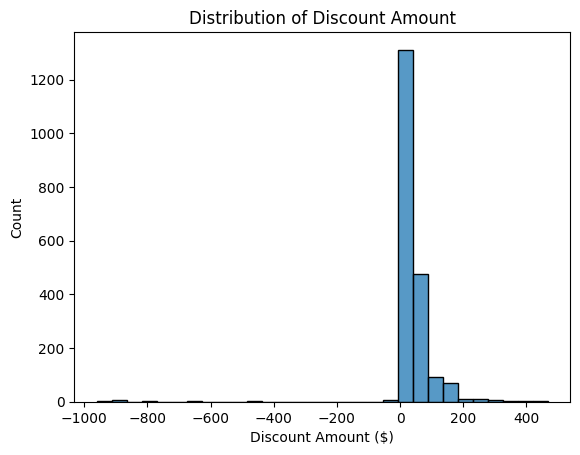

In [32]:
#Absolute Discount
sns.histplot(df['discount_amount'].dropna(), bins=30)
plt.title('Distribution of Discount Amount')
plt.xlabel('Discount Amount ($)')
plt.show()

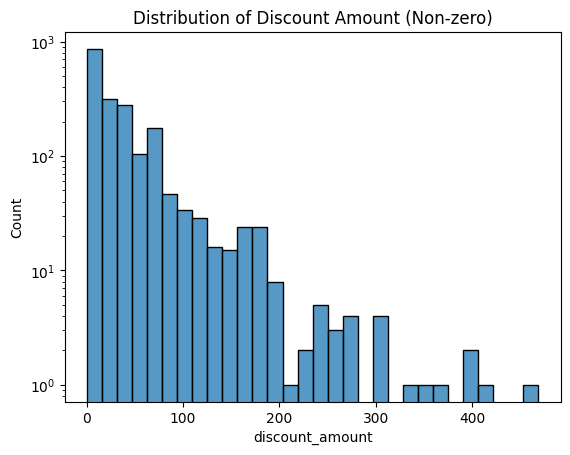

In [33]:
# Discount percentage
sns.histplot(df[df['discount_amount'] > 0]['discount_amount'], bins=30)
plt.yscale('log')
plt.title('Distribution of Discount Amount (Non-zero)')
plt.show()

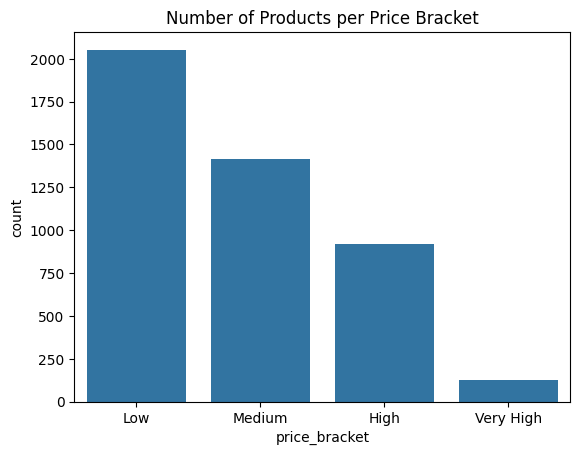

In [34]:
# Products per price bracket
sns.countplot(x='price_bracket', data=df)
plt.title('Number of Products per Price Bracket')
plt.show()

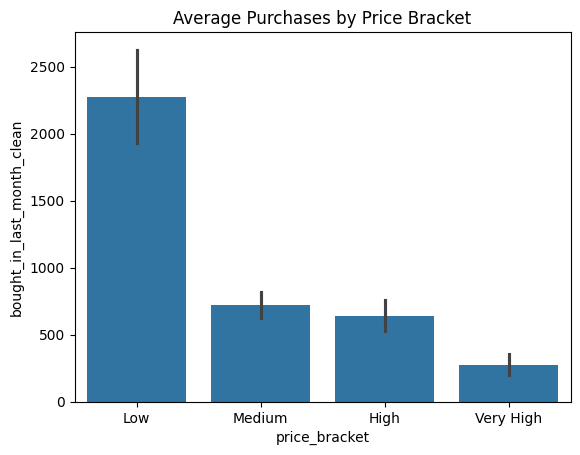

In [35]:
#Average Purchases by price bracket
sns.barplot(x='price_bracket', y='bought_in_last_month_clean', data=df)
plt.title('Average Purchases by Price Bracket')
plt.show()

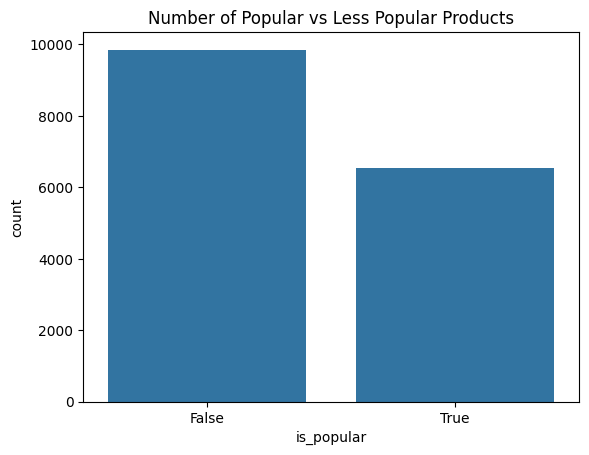

In [36]:
#popularity metrics
sns.countplot(x='is_popular', data=df)
plt.title('Number of Popular vs Less Popular Products')
plt.show()

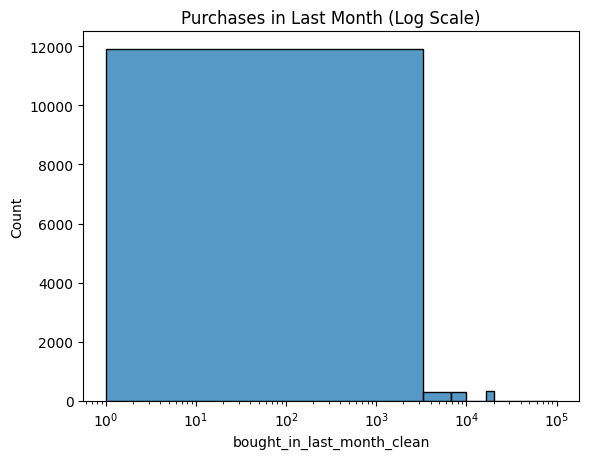

In [37]:
sns.histplot(df[df['bought_in_last_month_clean']>0]['bought_in_last_month_clean'], bins=30)
plt.xscale('log')
plt.title('Purchases in Last Month (Log Scale)')
plt.show()

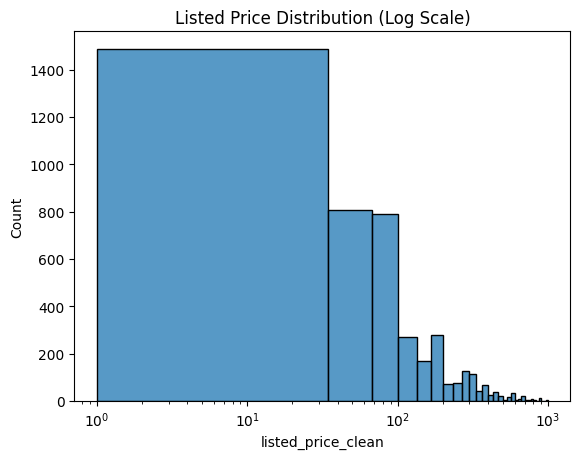

In [38]:
sns.histplot(df[df['listed_price_clean']>0]['listed_price_clean'], bins=30)
plt.xscale('log')
plt.title('Listed Price Distribution (Log Scale)')
plt.show()

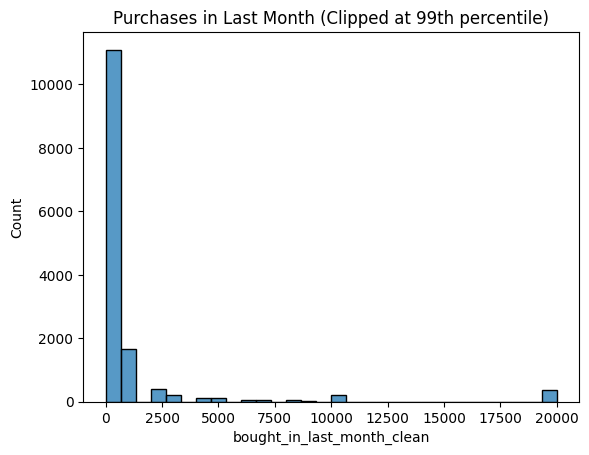

In [39]:
p99 = df['bought_in_last_month_clean'].quantile(0.99)
sns.histplot(df['bought_in_last_month_clean'].clip(upper=p99), bins=30)
plt.title('Purchases in Last Month (Clipped at 99th percentile)')
plt.show()

# Modeling

## Data Prep

In [40]:
# data prep
features = [
    'rating_numeric', 'number_of_reviews', 'bought_in_last_month_clean',
    'listed_price_clean', 'price_on_variant_clean', 'current/discounted_price',
    'discount_amount', 'discount_percentage', 'purchase_efficiency'
]
X = df[features]
y = df['bought_in_last_month_clean']

In [41]:
X = X.fillna(0)
y = y.fillna(0)
y_log = np.log1p(y)

In [42]:
df['purchase_efficiency'].fillna(0, inplace=True)
df.replace([np.inf, -np.inf], 0, inplace=True)

/tmp/ipython-input-1906501822.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['purchase_efficiency'].fillna(0, inplace=True)


## Train/Test Split

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

In [44]:
print(np.isinf(X).sum())

rating_numeric                 0
number_of_reviews              0
bought_in_last_month_clean     0
listed_price_clean             0
price_on_variant_clean         0
current/discounted_price       0
discount_amount                0
discount_percentage            0
purchase_efficiency           18
dtype: int64


In [45]:
print((X.abs() > 1e10).sum())

rating_numeric                 0
number_of_reviews              0
bought_in_last_month_clean     0
listed_price_clean             0
price_on_variant_clean         0
current/discounted_price       0
discount_amount                0
discount_percentage            0
purchase_efficiency           18
dtype: int64


## Linerar Regression

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred))) # model performance
print("R2 Score:", r2_score(y_test, y_pred))

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients
feature_importance = pd.Series(model.coef_, index=X_train.columns).sort_values(key=abs, ascending=False)
print(feature_importance)

In [ ]:
plt.scatter(np.expm1(y_test), np.expm1(y_pred), alpha=0.5)
plt.xlabel('Actual Purchases')
plt.ylabel('Predicted Purchases')
plt.title('Predicted vs Actual Purchases')
plt.show()

## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(importances)

#Business Insights
